In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter

In [36]:
# Import CSV file
dfMod = pd.read_csv('calibrationOutdoor.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp = pd.read_csv('calibrationAlpha.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet = pd.read_csv('calibrationBeta.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')


print(dfMod.head())
#print(dfAlp.head())


                                      timestamp         sn    rh  temp  \
timestamp_local                                                          
2023-04-11 12:45:21+00:00  2023-04-11T16:45:21Z  MOD-00353  23.0  25.1   
2023-04-11 12:44:21+00:00  2023-04-11T16:44:21Z  MOD-00353  23.0  25.1   
2023-04-11 12:43:21+00:00  2023-04-11T16:43:21Z  MOD-00353  22.9  25.1   
2023-04-11 12:42:21+00:00  2023-04-11T16:42:21Z  MOD-00353  22.8  25.1   
2023-04-11 12:41:21+00:00  2023-04-11T16:41:21Z  MOD-00353  22.9  25.0   

                               lat       lon device_state    pm1   pm25  \
timestamp_local                                                           
2023-04-11 12:45:21+00:00  39.9559 -75.18598       ACTIVE  2.558  2.792   
2023-04-11 12:44:21+00:00  39.9559 -75.18598       ACTIVE  2.303  2.446   
2023-04-11 12:43:21+00:00  39.9559 -75.18598       ACTIVE  2.682  2.867   
2023-04-11 12:42:21+00:00  39.9559 -75.18598       ACTIVE  2.678  2.805   
2023-04-11 12:41:21+00:00  39.9

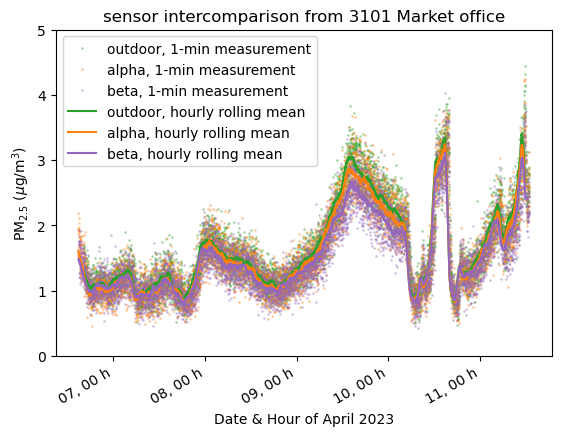

In [145]:
# Plot time series of one column
fig = plt.figure()
ax = plt.subplot(111)

dfMod['pm25'].plot(color='tab:green', marker='o', linestyle='', markersize=1, label='outdoor, 1-min measurement', alpha=0.3)
dfAlp['pm25'].plot(color='tab:orange', marker='o', linestyle='', markersize=1, label='alpha, 1-min measurement', alpha=0.3)
dfBet['pm25'].plot(color='tab:purple', marker='o', linestyle='', markersize=1, label='beta, 1-min measurement', alpha=0.3)

dfMod['60 mean']=dfMod.pm25.rolling( 60).mean()
dfMod['60 mean'].plot(color='tab:green', label='outdoor, hourly rolling mean')
dfAlp['60 mean']=dfAlp.pm25.rolling( 60).mean()
dfAlp['60 mean'].plot(color='tab:orange', label='alpha, hourly rolling mean')
dfBet['60 mean']=dfBet.pm25.rolling( 60).mean()
dfBet['60 mean'].plot(color='tab:purple', label='beta, hourly rolling mean')

ax.legend()

plt.ylim((0,5))
ax.xaxis.set_major_formatter(DateFormatter("%d, %H h"))
plt.xlabel('Date & Hour of April 2023')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
#plt.show()

plt.savefig('initialTimeseries.pdf',dpi=300,)

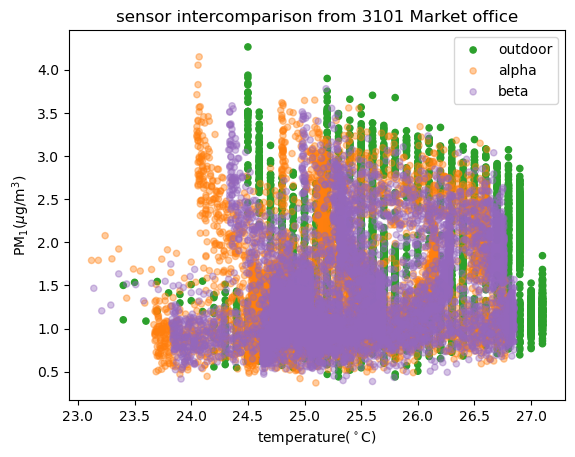

In [20]:
# Plot the two columns against each other
ax1 = dfMod.plot(x="temp", y="pm1", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_temp", y="pm1", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_temp", y="pm1", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{temperature }\ (^\circ \mathrm{C})$')
plt.ylabel(r'$\mathrm{PM}_{1} (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

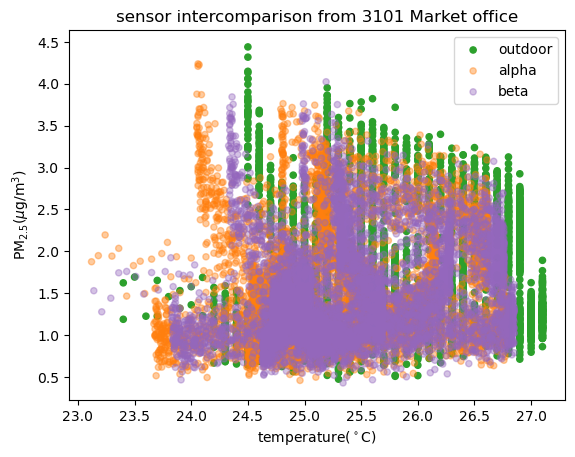

In [23]:
# Plot the two columns against each other
ax1 = dfMod.plot(x="temp", y="pm25", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_temp", y="pm25", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_temp", y="pm25", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{temperature }\ (^\circ \mathrm{C})$')
plt.ylabel(r'$\mathrm{PM}_{2.5} (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

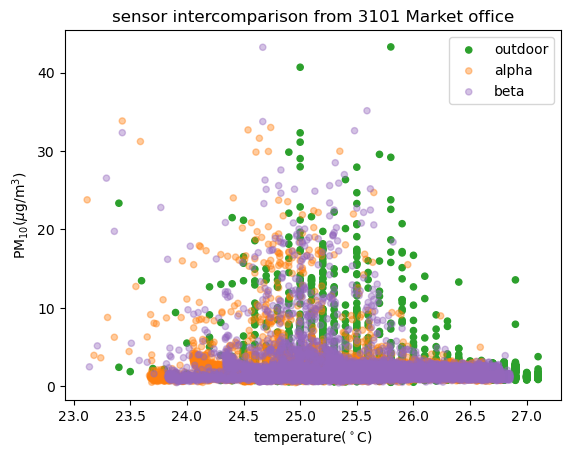

In [22]:
# Plot the two columns against each other
ax1 = dfMod.plot(x="temp", y="pm10", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_temp", y="pm10", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_temp", y="pm10", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{temperature }\ (^\circ \mathrm{C})$')
plt.ylabel(r'$\mathrm{PM}_{10} (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

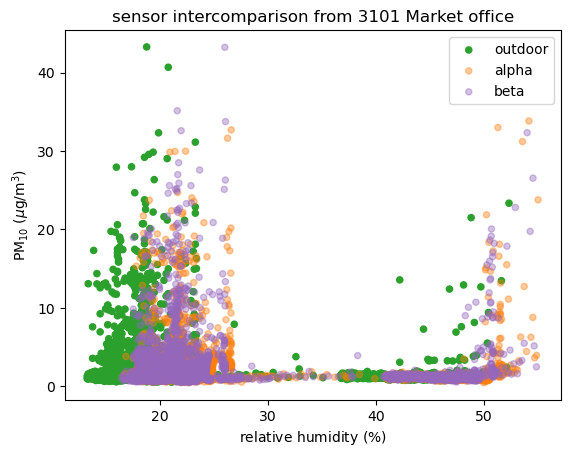

In [33]:
ax1 = dfMod.plot(x="rh", y="pm10", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_rh", y="pm10", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_rh", y="pm10", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
plt.ylabel(r'$\mathrm{PM}_{10}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

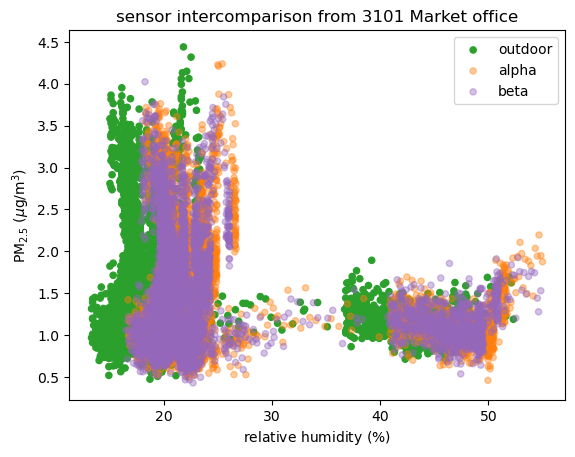

In [35]:
ax1 = dfMod.plot(x="rh", y="pm25", kind="scatter", color='tab:green', marker='o', linestyle='', label='outdoor')
dfAlp.plot(x="sample_rh", y="pm25", kind="scatter", color='tab:orange', marker='o', linestyle='', alpha=0.4, label='alpha', ax = ax1)
dfBet.plot(x="sample_rh", y="pm25", kind="scatter", color='tab:purple', marker='o', linestyle='', alpha=0.4, label='beta', ax = ax1)

# Show the plot
plt.xlabel(r'$\mathrm{relative\ humidity}\ (\%)$')
plt.ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
plt.title('sensor intercomparison from 3101 Market office')
plt.legend()
plt.show()

NameError: name 'figure' is not defined

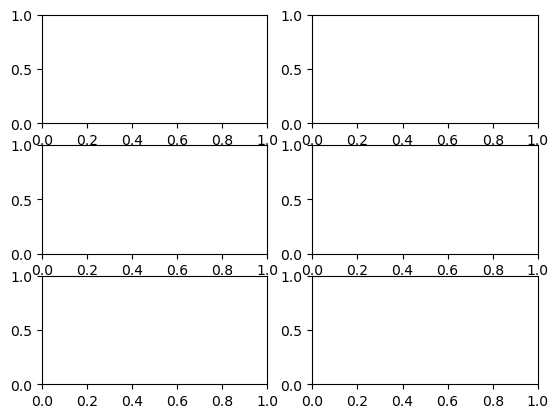

In [146]:
# Plot time series of one column
fig, axes = plt.subplots(3,2)

fig = plt(figsize=(14,6), dpi=300)

dfMod['pm25'].plot(color='tab:purple', marker='o', linestyle='', markersize=1, alpha=0.3, ax=axes[0,0], sharex=axes[2,0], xlim=[pd.Timestamp('2023-04-08'), pd.Timestamp('2023-04-11')], ylim=[0,5])
dfMod['pm10'].plot(color='tab:purple', marker='o', linestyle='', markersize=1, alpha=1, ax=axes[1,0], sharex=axes[2,0], xlim=[pd.Timestamp('2023-04-08'), pd.Timestamp('2023-04-11')], ylim=[0,45])
dfMod['o3'].plot(color='tab:orange', marker='o', linestyle='', markersize=1, alpha=1, ax=axes[2,0], xlim=[pd.Timestamp('2023-04-08'), pd.Timestamp('2023-04-11')], ylim=[0,50])

dfMod['pm25 60 mean']=dfMod.pm25.rolling(60).mean()
dfMod['pm25 60 mean'].plot(color='k', linewidth=0.8, ax=axes[0,0], sharex=axes[2,0])
dfMod['pm10 60 mean']=dfMod.pm10.rolling(60).mean()
dfMod['pm10 60 mean'].plot(color='k', linewidth=0.8, ax=axes[1,0], sharex=axes[2,0])
dfMod['o3 60 mean']=dfMod.o3.rolling(60).mean()
dfMod['o3 60 mean'].plot(color='k', linewidth=0.8, ax=axes[2,0])

dfMod['co'].plot(color='tab:gray', marker='o', linestyle='', markersize=1, alpha=1, ax=axes[0,1], sharex=axes[2,1], xlim=[pd.Timestamp('2023-04-08'), pd.Timestamp('2023-04-11')], ylim=[0,750])
dfMod['no'].plot(color='tab:blue', marker='o', linestyle='', markersize=1,  alpha=1, ax=axes[1,1], sharex=axes[2,1], xlim=[pd.Timestamp('2023-04-08'), pd.Timestamp('2023-04-11')], ylim=[0,4])
dfMod['no2'].plot(color='tab:blue', marker='o', linestyle='', markersize=1, alpha=1, ax=axes[2,1], xlim=[pd.Timestamp('2023-04-08'), pd.Timestamp('2023-04-11')], ylim=[0,15])

dfMod['co 60 mean']=dfMod.co.rolling(60).mean()
dfMod['co 60 mean'].plot(color='k', linewidth=0.8, ax=axes[0,1], sharex=axes[2,1])
dfMod['no 60 mean']=dfMod.no.rolling(60).mean()
dfMod['no 60 mean'].plot(color='k', linewidth=0.8, ax=axes[1,1], sharex=axes[2,1])
dfMod['no2 60 mean']=dfMod.no2.rolling(60).mean()
dfMod['no2 60 mean'].plot(color='k', linewidth=0.8, ax=axes[2,1])

axes[2,0].xaxis.set_major_formatter(DateFormatter("%d, %H h"))
axes[2,0].set_xlabel('Date & Hour of April 2023')

axes[2,1].xaxis.set_major_formatter(DateFormatter("%d, %H h"))
axes[2,1].set_xlabel('Date & Hour of April 2023')

for label in axes[2,0].get_xticklabels():
    label.set_horizontalalignment('center')
    label.set_rotation(45)

for label in axes[2,1].get_xticklabels():
    label.set_horizontalalignment('center')
    label.set_rotation(45)

axes[0,0].set_ylabel(r'$\mathrm{PM}_{2.5}\ (\mu \mathrm{g / m}^{3})$')
axes[1,0].set_ylabel(r'$\mathrm{PM}_{10}\ (\mu \mathrm{g / m}^{3})$')
axes[2,0].set_ylabel(r'$\mathrm{O}_{3}\ (\mathrm{ppb})$')


axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()
axes[0,1].set_ylabel(r'$\mathrm{CO}\ (\mathrm{ppb})$')
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()
axes[1,1].set_ylabel(r'$\mathrm{NO}\ (\mathrm{ppb})$')
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()
axes[2,1].set_ylabel(r'$\mathrm{NO}_{2}\ (\mathrm{ppb})$')


fig.suptitle('particulate and gas measurements from 3101 Market office')
#plt.show()

plt.savefig('pmGasTimeseries.pdf',dpi=300,)